**3.3 STATISTICAL GRAPHICS USING MATPLOTLIB**

The tips data we will be using for the next series of visualizations come from the seaborn library. This data set contains the amount of the tips that people leave for various variables. For example, the total cost of the bill, the size of the party, the day of the week, and the time of.

We can load this data set just as we did the Anscombe data set.

In [3]:
import seaborn as sns
tips = sns.load_dataset("tips")

print(tips.head())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


**3.3.1 Univariate**

In statistics jargon, the term “univariate” refers to a single variable.

**3.3.1.1 Histograms**

Histograms are the most common means of looking at a single variable. The values are “binned,” meaning they are grouped together and plotted to show the distribution of the variable (Figure 3.8).

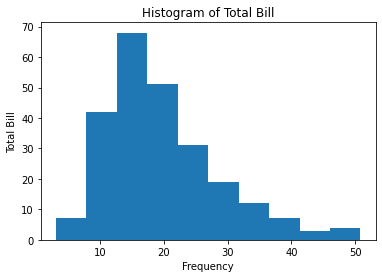

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()

axes1 = fig.add_subplot(1, 1, 1)
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig.show()